In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
fdg = pd.read_csv('../data/faults_diagnostics.csv').drop('Unnamed: 0', axis=1)
fdg

,FaultId,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,...,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,0.0,14.2100,False,66.48672,423178.70000,100.4,11.0,0.00,96.74375,...,0,111,17,True,2.0,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,9.2,14.3550,unknown,NaN,368419.30000,181.4,18.0,36.54,201.08750,...,11,629,12,True,127.0,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,9.2,14.3550,unknown,NaN,368419.30000,181.4,18.0,36.54,201.08750,...,11,1807,2,False,127.0,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,9.2,14.3550,unknown,NaN,368419.30000,181.4,18.0,36.54,201.08750,...,11,1807,2,True,127.0,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,17.6,3.5525,unknown,NaN,366722.90000,177.8,28.5,45.82,225.78130,...,0,4364,17,False,2.0,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054108,1248454,25.2,14.3550,unknown,NaN,369586.50000,185.0,28.0,36.54,208.45630,...,0,1761,17,False,3.0,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000
1054109,1248455,100.0,14.5000,True,64.62260,423937.90000,185.0,51.0,37.12,211.49370,...,0,1569,31,True,5.0,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000
1054110,1248456,0.0,14.3550,True,66.48672,465925.40000,186.8,62.0,41.18,212.84380,...,0,3216,10,True,1.0,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000
1054111,1248457,1.6,14.4275,False,67.72946,28606.65625,181.4,0.0,27.26,221.73120,...,0,111,18,True,8.0,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000


In [4]:
def derate_cat(spn, fmi):
    if spn == 5246:
        return'full_drt'
    elif (spn == 1569 and fmi ==31):
        return 'part_drt'
    else:
        return 'other'

In [5]:
fdg['derate'] = fdg.apply(lambda x: derate_cat(x['spn'], x['fmi']), axis =1)

In [6]:
fdg['derate'].unique()

array(['other', 'part_drt', 'full_drt'], dtype=object)

In [7]:
fdg.groupby('EquipmentID')[['AcceleratorPedal', 'BarometricPressure', 'LocationTimeStamp']]

In [8]:
fdg['date']=pd.to_datetime(fdg['LocationTimeStamp'],infer_datetime_format=True)
fdg['date'].dtype

dtype('<M8[ns]')

In [ ]:
# fdg['date']

In [ ]:
#fdg['date'].nunique()

In [10]:
fdg.groupby('EquipmentID').max()['derate'].value_counts()

<ipython-input-10-055d32d2311b>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  fdg.groupby('EquipmentID').max()['derate'].value_counts()


other       549
part_drt    491
Name: derate, dtype: int64

In [11]:
fdg.groupby('EquipmentID')['derate'].value_counts().sort_values()

EquipmentID  derate  
1768         full_drt        1
1339         part_drt        1
1944         part_drt        1
1930         part_drt        1
1896         full_drt        1
                         ...  
1625         other       13154
1646         other       13611
1606         other       13771
1605         other       14543
1641         other       15282
Name: derate, Length: 1722, dtype: int64

In [12]:
#group equipments by type and number of derates
pd.DataFrame(fdg.groupby('EquipmentID')['derate'].value_counts())

derate
EquipmentID derate          
301         other        798
            full_drt       1
302         other       3123
            full_drt       6
303         other       1419
...                      ...
2375        other         10
2376        other         14
2377        other         14
2380        other          1
2381        other          2

[1722 rows x 1 columns]

In [13]:
print(fdg[fdg['derate']=='full_drt'].groupby('EquipmentID')['derate'].value_counts().sort_values(ascending = False).head(10))

print(fdg[fdg['derate']=='full_drt'].groupby('EquipmentID')['derate'].value_counts().sort_values(ascending = False).shape)

print(fdg[fdg['derate']=='part_drt'].groupby('EquipmentID')['derate'].value_counts().sort_values(ascending = False).head(10))

print(fdg[fdg['derate']=='part_drt'].groupby('EquipmentID')['derate'].value_counts().sort_values(ascending = False).shape)

EquipmentID  derate  
1524         full_drt    60
1535         full_drt    44
305          full_drt    28
1539         full_drt    25
1525         full_drt    25
1490         full_drt    23
1453         full_drt    22
1549         full_drt    18
1547         full_drt    18
1534         full_drt    17
Name: derate, dtype: int64
(191,)
EquipmentID  derate  
1490         part_drt    376
1505         part_drt    263
1444         part_drt    193
1445         part_drt    192
1790         part_drt    186
1758         part_drt    180
1494         part_drt    170
1607         part_drt    161
1480         part_drt    158
1804         part_drt    150
Name: derate, dtype: int64
(491,)


The most number of full derates is experienced by equipment id 1524 at 60 derates.
There are 191 equipments with at least 1 full derate (spn 5246).
The most number of partial derates is experienced by equipment id 1490 at 376 partial derates.
There are 491 trucks with at least 1 partial derate.

<AxesSubplot:>

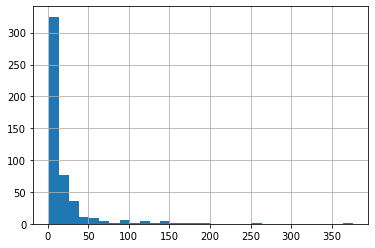

In [14]:
#fdg[fdg['derate']=='part_drt'].groupby('EquipmentID')['derate'].value_counts().plot(kind='bar')
part_drt_counts = fdg[fdg['derate']=='part_drt'].groupby('EquipmentID')['derate'].value_counts()
part_drt_counts.hist(bins = 30)

x-axis represents number of partial derates by a single equipment, y-axis represents number of equipments with x number of partial derates. Most equipments that have atleast 1 partial derate have less than 20 partial derates throughout the time included in the dataset. Partial derates more that 150 are outliers (10 equipments: id1490 at 376 is the max). 

<AxesSubplot:>

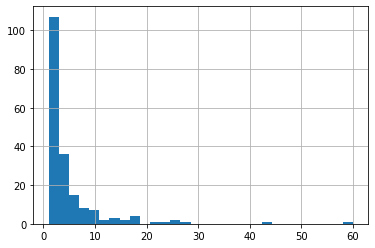

In [16]:
full_drt_counts = fdg[fdg['derate']=='full_drt'].groupby('EquipmentID')['derate'].value_counts()
full_drt_counts.hist(bins = 30)

most equipments that have atleast 1 full derate only have less than 5 full derates. Full derates more than 20 throughout the time are outliers. 

In [17]:
fdg[fdg['derate']=='full_drt'].groupby(['EquipmentID', 'date'])['derate'].value_counts().sort_values(ascending = False)


EquipmentID  date                 derate  
1452         2016-02-08 14:17:33  full_drt    6
2209         2018-11-28 13:39:58  full_drt    4
1815         2018-11-28 13:36:13  full_drt    2
2209         2018-11-27 09:22:54  full_drt    2
1800         2017-03-29 04:03:48  full_drt    2
                                             ..
1528         2016-12-18 09:47:34  full_drt    1
             2016-12-18 10:54:27  full_drt    1
             2017-02-25 07:30:45  full_drt    1
             2017-02-25 08:30:42  full_drt    1
2211         2020-02-03 15:47:23  full_drt    1
Name: derate, Length: 905, dtype: int64

In [18]:
#should those duplicate derates in a day be dropped?

In [42]:
fdg.groupby(['EquipmentID', 'date'])['derate'].value_counts().sort_values(ascending = False)

EquipmentID  date                 derate
1643         2017-01-09 17:37:30  other     97
2124         2019-01-16 12:14:50  other     74
2007         2019-06-24 09:10:08  other     53
1635         2017-07-19 11:38:53  other     51
1452         2016-02-08 14:17:33  other     50
                                            ..
1604         2015-12-19 09:37:29  other      1
             2015-12-19 10:27:20  other      1
             2015-12-19 10:28:31  other      1
             2015-12-19 11:28:50  other      1
2381         2020-03-06 11:58:05  other      1
Name: derate, Length: 940355, dtype: int64

In [44]:
fdg[(fdg['EquipmentID']==1452)&(fdg['date']=='2016-02-08 14:17:33')][['RecordID', 'EquipmentID', 'date', 'spn', 'fmi', 'Latitude', 'Longitude', 'active']]

,RecordID,EquipmentID,date,spn,fmi,Latitude,Longitude,active
336576,378022,1452,2016-02-08 14:17:33,444,18,39.61625,-84.231666,True
336577,378023,1452,2016-02-08 14:17:33,50353,0,39.61625,-84.231666,True
336578,378024,1452,2016-02-08 14:17:33,50353,0,39.61625,-84.231666,False
336579,378025,1452,2016-02-08 14:17:33,3362,31,39.61625,-84.231666,True
336580,378026,1452,2016-02-08 14:17:33,3362,31,39.61625,-84.231666,True
...,...,...,...,...,...,...,...,...
336636,378082,1452,2016-02-08 14:17:33,5246,0,39.61625,-84.231666,True
336637,378083,1452,2016-02-08 14:17:33,3360,19,39.61625,-84.231666,True
336638,378084,1452,2016-02-08 14:17:33,5491,5,39.61625,-84.231666,True
336639,378085,1452,2016-02-08 14:17:33,5246,0,39.61625,-84.231666,True


In [ ]:
#try to keep only first recordid within a day and drop the rest. 

In [48]:
fdg.groupby(['EquipmentID', 'date'])['RecordID'].value_counts()

EquipmentID  date                 RecordID
301          2015-05-11 13:11:57  49415       1
             2015-05-13 08:23:09  51363       1
             2015-05-18 09:34:40  57330       1
             2015-05-21 13:58:10  61706       1
             2015-05-21 14:54:27  61801       1
                                             ..
2377         2020-03-06 14:14:49  1248457     1
             2020-03-06 14:15:30  1248458     1
2380         2020-03-04 10:06:47  1247712     1
2381         2020-03-06 11:57:53  1248422     1
             2020-03-06 11:58:05  1248423     1
Name: RecordID, Length: 1054113, dtype: int64

In [41]:
fdg[(fdg['EquipmentID']==1452)&(fdg['date']=='2016-02-08 14:17:33')][['EquipmentID', 'date', 'spn', 'fmi', 'Latitude', 'Longitude']].groupby('spn')['spn'].value_counts()

spn    spn  
158    158      2
444    444      7
829    829      1
1569   1569     6
3216   3216     5
3218   3218     6
3226   3226     1
3228   3228     6
3360   3360     4
3361   3361     3
3362   3362     7
4376   4376     2
5246   5246     6
5491   5491     2
50353  50353    4
Name: spn, dtype: int64

In [28]:
print('Earliest date: ' + str(fdg['date'].min()))
print('Most recent date: ' + str(fdg['date'].max()))


Earliest date: 2000-03-18 19:14:46
Most recent date: 2020-03-06 14:15:30


In [ ]:
# dont use
#start_time = fdg['date'].min()
# fdg['days_count'] =(fdg['date']-start_time).dt.days
# fdg['days_count']

<AxesSubplot:>

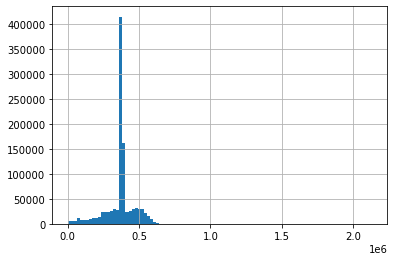

In [45]:
fdg['DistanceLtd'].hist(bins =100)

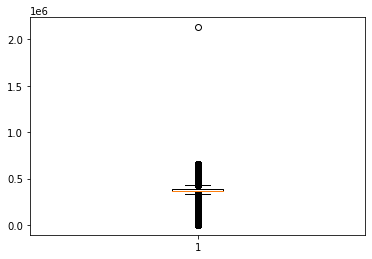

In [47]:
plt.boxplot(fdg['DistanceLtd'])
plt.show()

In [29]:
fdg.sort_values(by = 'date')

,FaultId,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,...,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,derate,date
1025026,1211418,0.0,14.4275,False,34.17542,274765.40000,183.2,15.0,25.52,190.8500,...,3,True,126.0,2015,105427130,36.935972,-86.507407,2000-03-18 19:14:46.000,other,2000-03-18 19:14:46
1025025,1211417,0.0,14.4275,False,34.17542,274765.40000,183.2,15.0,25.52,190.8500,...,3,True,126.0,2015,105427130,36.935972,-86.507407,2000-03-18 19:14:46.000,other,2000-03-18 19:14:46
1025027,1211419,0.0,14.3550,unknown,NaN,392138.00000,181.4,15.0,33.06,199.7375,...,3,False,126.0,2015,105427130,36.929120,-86.496898,2000-03-18 19:20:43.000,other,2000-03-18 19:20:43
1025028,1211420,0.0,14.3550,unknown,NaN,392138.00000,181.4,15.0,33.06,199.7375,...,3,False,126.0,2015,105427130,36.929120,-86.496898,2000-03-18 19:20:43.000,other,2000-03-18 19:20:43
1025029,1211422,9.2,14.3550,unknown,NaN,368419.30000,181.4,18.0,36.54,201.0875,...,7,False,13.0,1849,105381862,36.758194,-86.171620,2000-03-19 02:59:53.000,other,2000-03-19 02:59:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054108,1248454,25.2,14.3550,unknown,NaN,369586.50000,185.0,28.0,36.54,208.4563,...,17,False,3.0,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000,other,2020-03-06 14:00:21
1054109,1248455,100.0,14.5000,True,64.62260,423937.90000,185.0,51.0,37.12,211.4937,...,31,True,5.0,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000,part_drt,2020-03-06 14:04:59
1054110,1248456,0.0,14.3550,True,66.48672,465925.40000,186.8,62.0,41.18,212.8438,...,10,True,1.0,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000,other,2020-03-06 14:14:14
1054111,1248457,1.6,14.4275,False,67.72946,28606.65625,181.4,0.0,27.26,221.7312,...,18,True,8.0,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000,other,2020-03-06 14:14:49


In [30]:
#grab earliest date for each eq id
fdgmin = fdg.groupby('EquipmentID').min().reset_index(drop=False)[['EquipmentID', 'date']]
fdgmin.rename(columns = {'date':'earliest'}, inplace = True)
fdgmin

<ipython-input-30-979a56e9aad0>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  fdgmin = fdg.groupby('EquipmentID').min().reset_index(drop=False)[['EquipmentID', 'date']]


,EquipmentID,earliest
0,301,2015-05-11 13:11:57
1,302,2015-02-21 13:09:42
2,303,2015-09-28 05:44:54
3,304,2015-02-23 06:27:23
4,305,2015-02-21 12:18:32
...,...,...
1035,2375,2020-01-22 12:13:43
1036,2376,2020-01-08 10:31:17
1037,2377,2020-01-14 13:43:10
1038,2380,2020-03-04 10:06:47


In [31]:
#merge back to fdg--adds an earliest day column specific to equipment
fdg2 = pd.merge(fdg, fdgmin, on = 'EquipmentID', how = 'left')
fdg2.shape

(1054113, 45)

In [32]:
#calculate number of days since earliest date of eq for each record
fdg2['daysct'] = (fdg2['date']-fdg2['earliest']).dt.days
fdg2

,FaultId,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,...,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,derate,date,earliest,daysct
0,1,0.0,14.2100,False,66.48672,423178.70000,100.4,11.0,0.00,96.74375,...,2.0,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,other,2015-02-21 11:34:25,2015-02-21 11:34:25,0
1,2,9.2,14.3550,unknown,NaN,368419.30000,181.4,18.0,36.54,201.08750,...,127.0,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000,other,2015-02-21 11:35:10,2015-02-21 11:34:25,0
2,3,9.2,14.3550,unknown,NaN,368419.30000,181.4,18.0,36.54,201.08750,...,127.0,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000,other,2015-02-21 11:35:26,2015-02-21 11:35:26,0
3,4,9.2,14.3550,unknown,NaN,368419.30000,181.4,18.0,36.54,201.08750,...,127.0,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000,other,2015-02-21 11:36:08,2015-02-21 11:35:26,0
4,5,17.6,3.5525,unknown,NaN,366722.90000,177.8,28.5,45.82,225.78130,...,2.0,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000,other,2015-02-21 11:39:37,2015-02-21 11:39:37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054108,1248454,25.2,14.3550,unknown,NaN,369586.50000,185.0,28.0,36.54,208.45630,...,3.0,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000,other,2020-03-06 14:00:21,2019-05-15 13:30:47,296
1054109,1248455,100.0,14.5000,True,64.62260,423937.90000,185.0,51.0,37.12,211.49370,...,5.0,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000,part_drt,2020-03-06 14:04:59,2016-09-14 08:21:34,1269
1054110,1248456,0.0,14.3550,True,66.48672,465925.40000,186.8,62.0,41.18,212.84380,...,1.0,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000,other,2020-03-06 14:14:14,2016-01-07 11:28:02,1520
1054111,1248457,1.6,14.4275,False,67.72946,28606.65625,181.4,0.0,27.26,221.73120,...,8.0,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000,other,2020-03-06 14:14:49,2020-01-14 13:43:10,52


In [33]:
#maximum number of days of an event since its first event
fdg2['daysct'].max() 

7292

In [34]:
#minimum number of days of an event since its first event
fdg2['daysct'].min()

0

<AxesSubplot:>

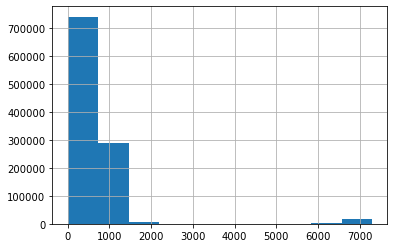

In [35]:
fdg2['daysct'].hist()

most faultids are recorded within 1000 days of their earliest record

In [39]:
fdg2.groupby('EquipmentID')['daysct'].min().sort_values(ascending = False)

EquipmentID
301     0
2015    0
2017    0
2018    0
2019    0
       ..
1683    0
1684    0
1685    0
1686    0
2381    0
Name: daysct, Length: 1040, dtype: int64

In [ ]:
#

<AxesSubplot:>

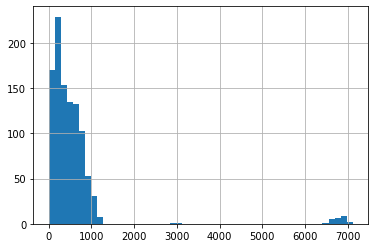

In [36]:
fdg2.groupby('EquipmentID')['daysct'].mean().hist(bins = 50)

x-axis represents average number of days since the first fault record, 
y-axis represents number of equipments
On average, most equipments have faults that occur within 1000 days of the first fault record.

<AxesSubplot:>

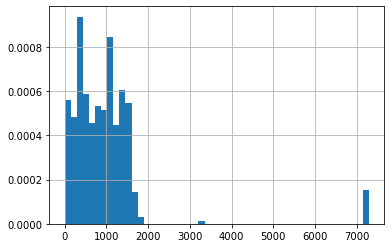

In [103]:
fdg2.groupby('EquipmentID')['daysct'].max().hist( bins = 50, density = True)

There is a wider distribution of the maximum number of days since the first fault record.

In [ ]:
#one-hot encoding ecuMake

In [104]:
fdg2['ecuMake'].unique()

array(['unknown', 'Volvo', 'Cummins', 'PACCAR', 'Eaton'], dtype=object)

In [110]:
ohe = pd.get_dummies(fdg2['ecuMake'])
fdg2 = pd.concat([fdg2, ohe], axis =1)
fdgg2 = fdg2.drop(['ecuMake'], axis = 1)
fdg2.head().T

,0,1,2,3,4
FaultId,1,2,3,4,5
AcceleratorPedal,0.0,9.2,9.2,9.2,17.6
BarometricPressure,14.21,14.355,14.355,14.355,3.5525
CruiseControlActive,False,unknown,unknown,unknown,unknown
CruiseControlSetSpeed,66.48672,NaN,NaN,NaN,NaN
DistanceLtd,423178.7,368419.3,368419.3,368419.3,366722.9
EngineCoolantTemperature,100.4,181.4,181.4,181.4,177.8
EngineLoad,11.0,18.0,18.0,18.0,28.5
EngineOilPressure,0.0,36.54,36.54,36.54,45.82
EngineOilTemperature,96.74375,201.0875,201.0875,201.0875,225.7813


1     186
2     121
4      36
3      35
5      18
6       7
7       6
10      4
8       3
9       2
Name: derate, dtype: int64


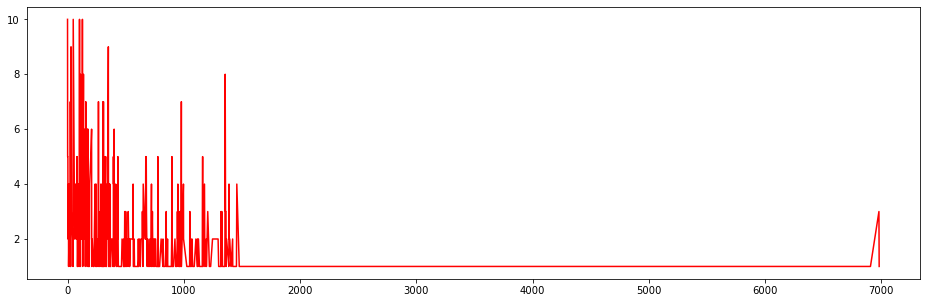

In [127]:
#for full derates, number of derates by day
timefail=pd.DataFrame(fdg2[fdg2['derate']=='full_drt'].groupby('daysct')['derate'].count())
print(timefail['derate'].value_counts()) 
plt.figure(figsize=(16,5))
plt.plot(timefail , color = 'r')

It is most common to see a full derate within a day (daysct =1) of the earliest fault recording. (occurs 186 times or 45% of full derates). 


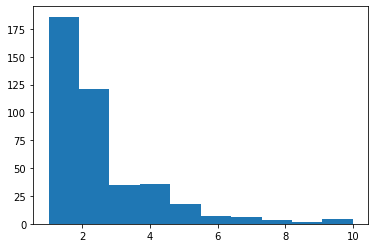

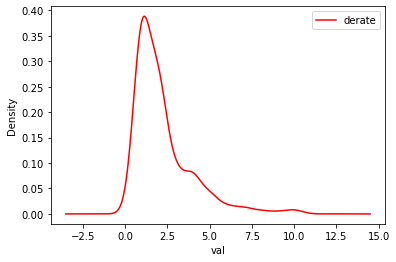

In [130]:
plt.hist(timefail)
timefail.plot.kde(color = 'r')
plt.xlabel('val')
plt.show()

In [61]:
#grab earliest date for each eq id
fdgmin = fdg.groupby('EquipmentID').min().reset_index(drop=False)[['EquipmentID', 'date']]
fdgmin.rename(columns = {'date':'earliest'}, inplace = True)
fdgmin

<ipython-input-61-979a56e9aad0>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  fdgmin = fdg.groupby('EquipmentID').min().reset_index(drop=False)[['EquipmentID', 'date']]


,EquipmentID,earliest
0,301,2015-05-11 13:11:57
1,302,2015-02-21 13:09:42
2,303,2015-09-28 05:44:54
3,304,2015-02-23 06:27:23
4,305,2015-02-21 12:18:32
...,...,...
1035,2375,2020-01-22 12:13:43
1036,2376,2020-01-08 10:31:17
1037,2377,2020-01-14 13:43:10
1038,2380,2020-03-04 10:06:47


In [66]:
#merge back to fdg--adds an earliest day column specific to equipment
fdg2 = pd.merge(fdg, fdgmin, on = 'EquipmentID', how = 'left')
fdg2.shape

(1049319, 45)

In [67]:
#calculate number of days since earliest date of eq for each record (gives unique day #)
fdg2['daysct'] = (fdg2['date']-fdg2['earliest']).dt.days
fdg2

,FaultId,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,...,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,derate,date,earliest,daysct
0,1,0.0,14.2100,False,66.48672,423178.70000,100.4,11.0,0.00,96.74375,...,2.0,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,other,2015-02-21 11:34:25,2015-02-21 11:34:25,0
1,2,9.2,14.3550,unknown,NaN,368419.30000,181.4,18.0,36.54,201.08750,...,127.0,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000,other,2015-02-21 11:35:10,2015-02-21 11:34:25,0
2,3,9.2,14.3550,unknown,NaN,368419.30000,181.4,18.0,36.54,201.08750,...,127.0,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000,other,2015-02-21 11:35:26,2015-02-21 11:35:26,0
3,4,9.2,14.3550,unknown,NaN,368419.30000,181.4,18.0,36.54,201.08750,...,127.0,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000,other,2015-02-21 11:36:08,2015-02-21 11:35:26,0
4,5,17.6,3.5525,unknown,NaN,366722.90000,177.8,28.5,45.82,225.78130,...,2.0,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000,other,2015-02-21 11:39:37,2015-02-21 11:39:37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049314,1248454,25.2,14.3550,unknown,NaN,369586.50000,185.0,28.0,36.54,208.45630,...,3.0,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000,other,2020-03-06 14:00:21,2019-05-15 13:30:47,296
1049315,1248455,100.0,14.5000,True,64.62260,423937.90000,185.0,51.0,37.12,211.49370,...,5.0,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000,part_drt,2020-03-06 14:04:59,2016-09-14 08:21:34,1269
1049316,1248456,0.0,14.3550,True,66.48672,465925.40000,186.8,62.0,41.18,212.84380,...,1.0,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000,other,2020-03-06 14:14:14,2016-01-07 11:28:02,1520
1049317,1248457,1.6,14.4275,False,67.72946,28606.65625,181.4,0.0,27.26,221.73120,...,8.0,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000,other,2020-03-06 14:14:49,2020-01-14 13:43:10,52


In [75]:
fdg2['daysct']

0             0
1             0
2             0
3             0
4             0
           ... 
1049314     296
1049315    1269
1049316    1520
1049317      52
1049318      52
Name: daysct, Length: 1049319, dtype: int64

In [76]:
import datetime

In [77]:
fdg2['EventTimeStamp'] = pd.to_datetime(fdg2['EventTimeStamp'])

In [ ]:
fdg2.info()

In [58]:
fdg2.groupby(['EquipmentID', 'daysct'])['RecordID'].unique()

EquipmentID  daysct
301          0                    [49415]
             1                    [51363]
             6                    [57330]
             10            [61706, 61801]
             16                   [68495]
                              ...        
2377         44        [1246549, 1246550]
             48        [1247361, 1247362]
             52        [1248457, 1248458]
2380         0                  [1247712]
2381         0         [1248422, 1248423]
Name: RecordID, Length: 150813, dtype: object

In [60]:
first_occurence_for_day = fdg2.groupby(['EquipmentID', 'daysct', 'spn', 'fmi'])['RecordID'].first().reset_index()
first_occurence_for_day

,EquipmentID,daysct,spn,fmi,RecordID
0,301,0,639,2,49415
1,301,1,596,31,51363
2,301,6,3226,10,57330
3,301,10,639,2,61706
4,301,16,3226,10,68495
...,...,...,...,...,...
227498,2377,44,111,18,1246549
227499,2377,48,111,18,1247361
227500,2377,52,111,18,1248457
227501,2380,0,1761,17,1247712


In [82]:
test = fdg2.drop_duplicates(subset=['EquipmentID', 'spn', 'fmi', 'EventTimeStamp'], keep='first')
test

,FaultId,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,...,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,derate,date,earliest,daysct
0,1,0.0,14.2100,False,66.48672,423178.70000,100.4,11.0,0.00,96.74375,...,2.0,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,other,2015-02-21 11:34:25,2015-02-21 11:34:25,0
1,2,9.2,14.3550,unknown,NaN,368419.30000,181.4,18.0,36.54,201.08750,...,127.0,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000,other,2015-02-21 11:35:10,2015-02-21 11:34:25,0
2,3,9.2,14.3550,unknown,NaN,368419.30000,181.4,18.0,36.54,201.08750,...,127.0,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000,other,2015-02-21 11:35:26,2015-02-21 11:35:26,0
3,4,9.2,14.3550,unknown,NaN,368419.30000,181.4,18.0,36.54,201.08750,...,127.0,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000,other,2015-02-21 11:36:08,2015-02-21 11:35:26,0
4,5,17.6,3.5525,unknown,NaN,366722.90000,177.8,28.5,45.82,225.78130,...,2.0,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000,other,2015-02-21 11:39:37,2015-02-21 11:39:37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049314,1248454,25.2,14.3550,unknown,NaN,369586.50000,185.0,28.0,36.54,208.45630,...,3.0,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000,other,2020-03-06 14:00:21,2019-05-15 13:30:47,296
1049315,1248455,100.0,14.5000,True,64.62260,423937.90000,185.0,51.0,37.12,211.49370,...,5.0,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000,part_drt,2020-03-06 14:04:59,2016-09-14 08:21:34,1269
1049316,1248456,0.0,14.3550,True,66.48672,465925.40000,186.8,62.0,41.18,212.84380,...,1.0,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000,other,2020-03-06 14:14:14,2016-01-07 11:28:02,1520
1049317,1248457,1.6,14.4275,False,67.72946,28606.65625,181.4,0.0,27.26,221.73120,...,8.0,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000,other,2020-03-06 14:14:49,2020-01-14 13:43:10,52


In [72]:
fdg.shape

(1049319, 44)

In [74]:
test[(test['EquipmentID']==1452)&(test['date']=='2016-02-08 14:17:33')][['RecordID', 'EquipmentID', '', 'spn', 'fmi', 'Latitude', 'Longitude', 'active']]

,RecordID,EquipmentID,date,spn,fmi,Latitude,Longitude,active
336581,378027,1452,2016-02-08 14:17:33,3218,2,39.61625,-84.231666,True
336586,378032,1452,2016-02-08 14:17:33,3228,2,39.61625,-84.231666,True
336615,378061,1452,2016-02-08 14:17:33,3216,9,39.61625,-84.231666,True
336616,378062,1452,2016-02-08 14:17:33,158,2,39.61625,-84.231666,True
336617,378063,1452,2016-02-08 14:17:33,5246,0,39.61625,-84.231666,True
336623,378069,1452,2016-02-08 14:17:33,3361,5,39.61625,-84.231666,True
336624,378070,1452,2016-02-08 14:17:33,829,4,39.61625,-84.231666,True
336625,378071,1452,2016-02-08 14:17:33,3360,9,39.61625,-84.231666,True
336630,378076,1452,2016-02-08 14:17:33,4376,5,39.61625,-84.231666,True
336635,378081,1452,2016-02-08 14:17:33,5491,5,39.61625,-84.231666,True
